<a href="https://colab.research.google.com/github/likhitha148/Machine_Learning/blob/main/Mobile_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd              #Used to play with datasets
import matplotlib.pyplot as plt




In [ ]:
data_train=pd.read_csv('/content/train.csv')
data_test=pd.read_csv('/content/test.csv')

In [ ]:
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
data_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


Exploratory Data analysis    #To know what data is telling to us

In [ ]:
data_train.info()  #to check any null values or present or not in our data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
data_train.isnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_test.isnull()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Plotting relation between the Pricerange and Ram

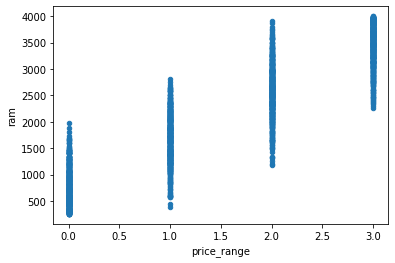

In [ ]:
data_train.plot(x='price_range',y='ram',kind='scatter')
plt.show()

Plotting relation between Pricerange and Battery power

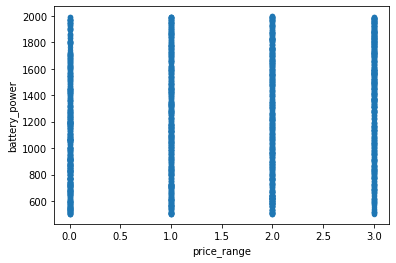

In [ ]:
data_train.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

Plotting relation between pricerange and Fc(frontcamera)


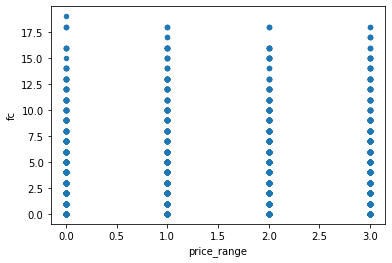

In [ ]:
data_train.plot(x='price_range',y='fc',kind='scatter')
plt.show()

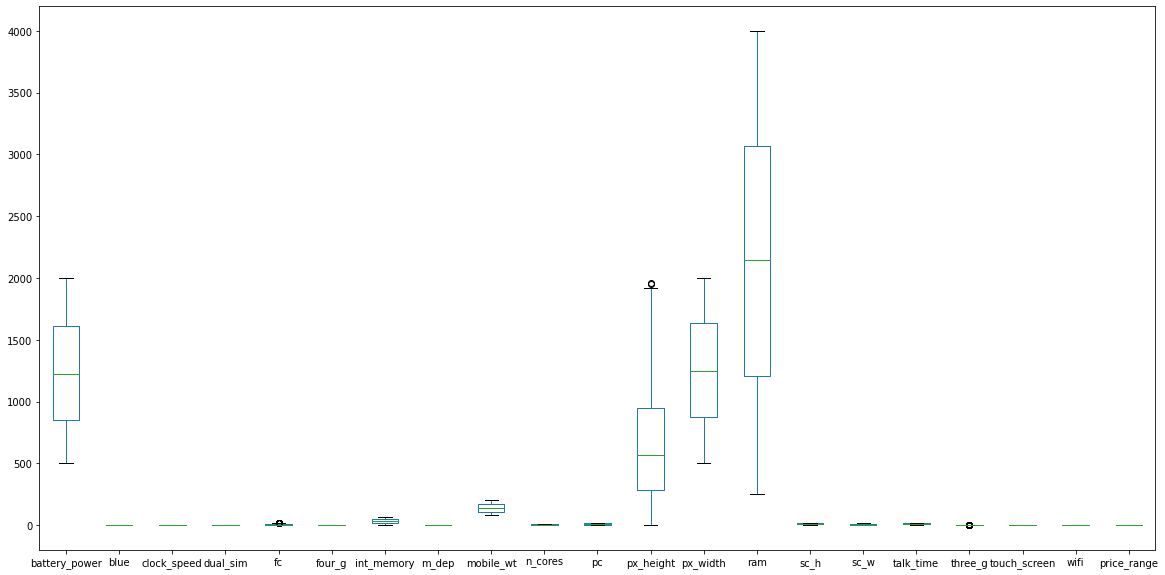

In [ ]:
data_train.plot(kind='box',figsize=(20,10))   #box is used to check outliers(just bcoz of one data or person the entire output will chnage or effect)
plt.show()

In [ ]:
x=data_train.drop('price_range',axis=1)

In [ ]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
data_test=data_test.drop('id',axis=1)

In [ ]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
y=data_train['price_range']

In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

Scaling the data #scaling makes the data equal by making mean will become 0 and std will become 1

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
X_std=std.fit_transform(X)         #fit_transform will move to x and analyse the pattern and it will transform and after analysing the data it ll transform

data_test_std=std.transform(data_test)

In [ ]:
X_std


array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [ ]:
data_test_std

array([[-0.44505984,  1.0100505 ,  0.34046327, ..., -1.78686097,
         0.99401789, -1.01409939],
       [-0.90487356,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.29403758,  1.0100505 ,  1.56625363, ..., -1.78686097,
         0.99401789,  0.98609664],
       ...,
       [-0.12182446, -0.9900495 , -0.14985287, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 0.67032987,  1.0100505 , -1.2530642 , ..., -1.78686097,
         0.99401789, -1.01409939],
       [ 0.07166151,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811,  0.98609664]])

Training the model

1) Decision Tree      

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_std,y)    #x_std means training data  y is labels(price_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt.predict(data_test_std)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 1, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 3, 3, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 3, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 2, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 3, 3, 2, 0, 2,
       1, 1, 3, 0, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0, 1, 2, 0, 2, 3, 3, 1, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 2, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2,
       3, 3, 3, 1, 1, 0, 2, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 3, 3, 1,

In [ ]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


2) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_std,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.predict(data_test_std)

array([2, 3, 1, 3, 2, 1, 3, 1, 2, 0, 3, 2, 0, 1, 3, 0, 1, 1, 3, 1, 1, 3,
       0, 0, 3, 2, 1, 0, 2, 0, 2, 2, 3, 0, 1, 1, 2, 0, 3, 2, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 3, 1, 2, 2, 3, 2, 1, 1, 0, 0,
       1, 1, 1, 2, 0, 1, 3, 1, 3, 0, 1, 1, 1, 2, 0, 2, 3, 1, 2, 0, 2, 1,
       1, 1, 2, 3, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 3, 1, 2, 1, 1, 2, 2,
       3, 0, 1, 3, 3, 2, 3, 2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 3, 2, 2, 0, 3, 2, 0, 2, 1, 3, 3, 2, 2, 2, 2, 1, 3, 1, 1, 2,
       1, 1, 3, 3, 2, 0, 2, 2, 2, 3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 3, 0, 1, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3,
       1, 0, 3, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 3, 0, 2, 0,
       0, 2, 1, 2, 3, 2, 1, 1, 2, 0, 0, 2, 2, 3, 0, 3, 3, 1, 3, 1, 0, 2,
       2, 3, 3, 0, 0, 0, 2, 3, 1, 0, 3, 2, 0, 3, 0, 2, 1, 0, 0, 3, 2, 3,
       2, 1, 1, 2, 3, 0, 3, 1, 2, 0, 1, 0, 1, 2, 1,

3) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_std,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.predict(data_test_std)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,


As we predicted on Test Data csv, we are not able to plot accuracy score as we dont have Ground Truth, so we are going to use only Train.csv and gonna split it into train and test

In [ ]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [ ]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
816,805,1,0.7,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,0,1,1
790,911,1,2.9,0,0,0,46,0.1,181,5,1,461,670,363,9,5,17,0,1,0
361,899,0,0.5,1,13,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,1,0
592,1263,0,0.5,0,12,0,64,0.3,175,5,18,178,1883,1183,14,3,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,11,0.9,109,2,12,35,510,1672,17,13,19,1,1,0
1096,1154,0,2.0,0,6,1,35,0.8,159,5,16,1003,1827,3262,16,15,16,1,0,0
1932,718,1,1.6,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1,1
235,1523,1,1.8,0,6,1,11,0.1,129,1,8,148,1606,707,19,8,19,1,1,0


In [ ]:
y_train

0       1
816     0
790     0
361     0
592     1
       ..
1791    0
1096    3
1932    1
235     0
1061    1
Name: price_range, Length: 1600, dtype: int64

1) Decision Tree

We dont need to use Standard Scaler for DT since distance doesnt matter here

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [ ]:
dt.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dt.predict(X_test)


In [ ]:
y_pred

array([0, 0, 1, 0, 3, 2, 1, 1, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 1, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 3, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 1, 2, 3, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 0, 1, 2, 2, 3, 1, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 1, 3, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1,
       0, 1, 2, 1, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       1, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 2, 3, 0, 1, 1, 3, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,

In [ ]:
y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
dt_ac=accuracy_score(y_test,y_pred)


In [ ]:
dt_ac

0.8625

2. KNN

We need to use Standard Scaler for knn since distance matter here

In [ ]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)


In [ ]:
X_test_std


array([[-0.49109398, -0.99128795,  1.33165174, ...,  0.56965192,
        -1.02020406, -1.01384584],
       [-0.56454768,  1.00878862,  0.35176429, ...,  0.56965192,
         0.98019606, -1.01384584],
       [-1.46665102,  1.00878862, -1.24055283, ...,  0.56965192,
         0.98019606,  0.98634324],
       ...,
       [ 1.45083838,  1.00878862,  0.35176429, ...,  0.56965192,
        -1.02020406, -1.01384584],
       [ 1.65054065, -0.99128795, -1.24055283, ...,  0.56965192,
         0.98019606, -1.01384584],
       [-1.33810703,  1.00878862, -0.99558096, ...,  0.56965192,
        -1.02020406, -1.01384584]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_test_std)


In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 2, 1, 3, 0, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 2,
       1, 3, 3, 2, 2, 1, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 1, 1, 0, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 0, 1, 0, 0, 3, 2, 2, 3, 1, 2, 0,
       2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 3, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 3, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 0, 1, 0, 0, 2, 3, 1, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 1, 0, 1, 3,
       2, 0, 1, 3, 0, 3, 0, 2, 1, 3, 3, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 3,
       2, 0, 3, 2, 0, 3, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 3, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 1, 0, 3, 2, 1, 0, 1, 3, 3, 1, 1, 0, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 0, 3, 2, 2, 0, 0, 1, 1, 3, 1, 2, 1, 0, 1, 0, 1, 2,
       2, 2, 2, 0, 1, 0, 3, 0, 0, 2, 2, 3, 0, 2, 1, 2, 3, 1, 1, 0, 2, 1,
       1, 2, 0, 0, 1, 3, 1, 3, 0, 0, 2, 3, 3, 3, 0,

In [ ]:
y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

In [ ]:
knn_ac=accuracy_score(y_test,y_pred)

In [ ]:
knn_ac

0.5225

3) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [ ]:
lr.fit(X_train_std,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lr.predict(X_test_std)


In [ ]:
y_pred

array([0, 0, 1, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 0, 3, 2, 1,
       1, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 2, 1, 0, 3, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 3, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 2,

In [ ]:
y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

In [ ]:
lr_ac=accuracy_score(y_test,y_pred)


In [ ]:
lr_ac

0.96

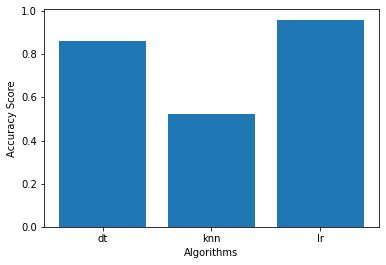

In [ ]:
plt.bar(x=['dt','knn','lr'],height=[dt_ac,knn_ac,lr_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()
